In [2]:
# statistical: min, max, arithmetic mean, median, sum, std deviation, variance, 
# rms value, skewness, kurtosis, shannon entropy, log energy entropy
# 12 features

In [3]:
import statistics as st #statistical calc
import numpy as np
import pandas as pd
import scipy.stats as scst
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def shannon(x):
    y = np.power(x,2)
    y1 = np.sum(y)
    PE = y/y1
    SE = -np.sum(PE*np.log(np.power(PE,2)))
    return SE

def Logenergy(x):
    y = np.power(x,2)
    y1 = np.sum(y)
    PE = y/y1
    LEE = np.sum(PE*np.log(PE))
    return LEE

C:\Users\anne_\AppData\Local\Temp\ipykernel_1464\2148824677.py:44: UserWarning: Legend does not support handles for ndarray instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend([idx_delta, idx_theta, idx_alpha, idx_beta_low, idx_beta, idx_beta_high, idx_gamma],


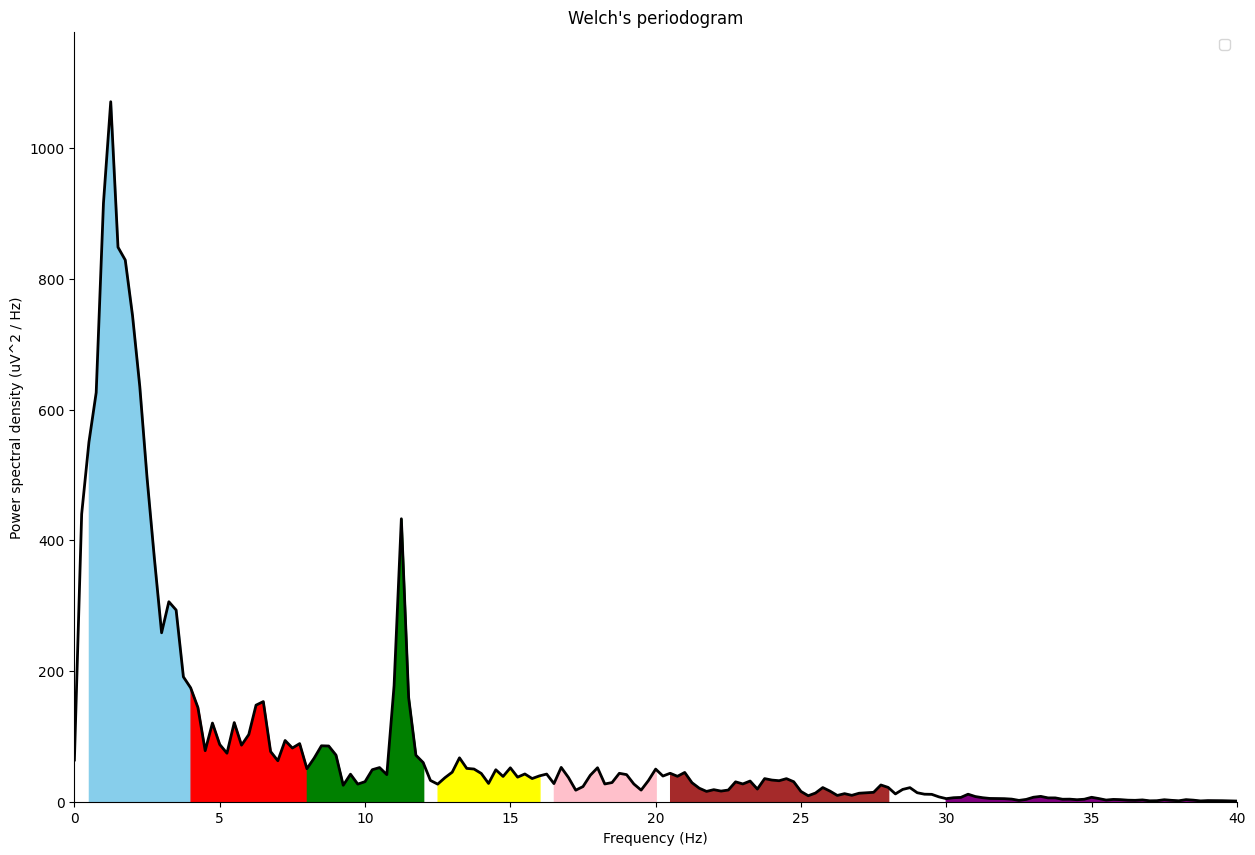

In [23]:
from scipy import signal
data = pd.read_csv('Dataset\Output1\C_1\s1.csv')
x = data.iloc[:,1].values
# data.iloc[:,1].plot(figsize=(15,10))
sf = 256.
win = 4 * sf
freqs, psd = signal.welch(x, sf, nperseg=win)

# Plot the power spectrum
# Define frequency bands
delta_band = (0.5, 4)  # Delta band (0.5 - 4 Hz)
theta_band = (4, 8)  # Theta band (4 - 8 Hz)
alpha_band = (8, 12)  # Alpha band (8 - 13 Hz)
beta_band_low = (12.5, 16)
beta_band = (16.5, 20)   
beta_band_high = (20.5,28)
gamma_band = (30, 100)  # Gamma band (30 - 100 Hz)

# Find intersecting values in frequency vector
idx_delta = np.logical_and(freqs >= delta_band[0], freqs <= delta_band[1])
idx_theta = np.logical_and(freqs >= theta_band[0], freqs <= theta_band[1])
idx_alpha = np.logical_and(freqs >= alpha_band[0], freqs <= alpha_band[1])
idx_beta_low = np.logical_and(freqs >= beta_band_low[0], freqs <= beta_band_low[1])
idx_beta = np.logical_and(freqs >= beta_band[0], freqs <= beta_band[1])
idx_beta_high = np.logical_and(freqs >= beta_band_high[0], freqs <= beta_band_high[1])
idx_gamma = np.logical_and(freqs >= gamma_band[0], freqs <= gamma_band[1])

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(15, 10))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_delta, color='skyblue')
plt.fill_between(freqs, psd, where=idx_theta, color='red')
plt.fill_between(freqs, psd, where=idx_alpha, color='green')
plt.fill_between(freqs, psd, where=idx_beta_low, color='yellow')
plt.fill_between(freqs, psd, where=idx_beta, color='pink')
plt.fill_between(freqs, psd, where=idx_beta_high, color='brown')
plt.fill_between(freqs, psd, where=idx_gamma, color='purple')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 40])
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.legend([idx_delta, idx_theta, idx_alpha, idx_beta_low, idx_beta, idx_beta_high, idx_gamma],
            ['idx_delta', 'idx_theta', 'idx_alpha', 'idx_beta_low', 'idx_beta', 'idx_beta_high', 'idx_gamma']            
)
sns.despine()


In [36]:
from scipy.integrate import simps
total_power = simps(psd, dx=freq_res)

freq_res = freqs[1] - freqs[0]  # = 1 / 4 = 0.25

# Compute the absolute power by approximating the area under the curve
delta_power = simps(psd[idx_delta], dx=freq_res)
print('Absolute delta power: %.3f uV^2' % delta_power)

# Relative delta power (expressed as a percentage of total power)
delta_rel_power = delta_power / total_power
print('Relative delta power: %.3f' % delta_rel_power)

########
theta_power = simps(psd[idx_theta], dx=freq_res)
print('Absolute theta power: %.3f uV^2' % theta_power)

# Relative delta power (expressed as a percentage of total power)
theta_rel_power = theta_power / total_power
print('Relative theta power: %.3f' % theta_rel_power)

########
alpha_power = simps(psd[idx_alpha], dx=freq_res)
print('Absolute alpha power: %.3f uV^2' % alpha_power)

# Relative delta power (expressed as a percentage of total power)
alpha_rel_power = alpha_power / total_power 
print('Relative alpha power: %.3f ' % alpha_rel_power)


Absolute delta power: 1996.865 uV^2
Relative delta power: 0.561
Absolute theta power: 410.799 uV^2
Relative theta power: 0.115
Absolute alpha power: 378.680 uV^2
Relative alpha power: 0.106 


In [7]:
MIN = np.min(x)
print('Min value is:',MIN)
MAX = np.max(x)
print('Max value is:',MAX)
MEAN = np.mean(x)
print('Mean value is:',MEAN)
MED = np.median(x)
print('Median value is:',MED)
SUM = np.sum(x)
print('Sum value is:',SUM)
STD = np.std(x)
print('Std deviation value is:',STD)
VAR = st.variance(x)
print('Variance value is:',VAR)
SKEW = scst.skew(x)
print('Skewness value is:',SKEW)
KURT = scst.kurtosis(x)
print('Kurtosis value is:',KURT)
# SE = shannon(x)
# print(SE)
# LEE = Logenergy(x)
# print(LEE)


Min value is: -214
Max value is: 309
Mean value is: -1.3560546875
Median value is: -4.0
Sum value is: -6943
Std deviation value is: 56.797924959869874
Variance value is: 3226
Skewness value is: 0.9265041865486833
Kurtosis value is: 3.571612715218482
